## 1. Load and set up data (Amazon baby product review data)

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

from sklearn import metrics

In [2]:
review = pd.read_csv('amazon_baby.csv')

In [3]:
review.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
name      183213 non-null object
review    182702 non-null object
rating    183531 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


**From the above info, we know that there are null values.**

In [5]:
# drop na
review = review.dropna()

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182384 entries, 0 to 183530
Data columns (total 3 columns):
name      182384 non-null object
review    182384 non-null object
rating    182384 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.6+ MB


**After dropping the missing values, the new dataset has 182384 rows.**  

In [7]:
print 'Unique product names: %i' % review.name.nunique()
print 'Unique ratings: %i' % review.rating.nunique()

Unique product names: 32315
Unique ratings: 5


In [8]:
review.rating.unique()

array([3, 5, 4, 2, 1], dtype=int64)

**So the products are rated from 1-5.**

## 2. Visualize the data

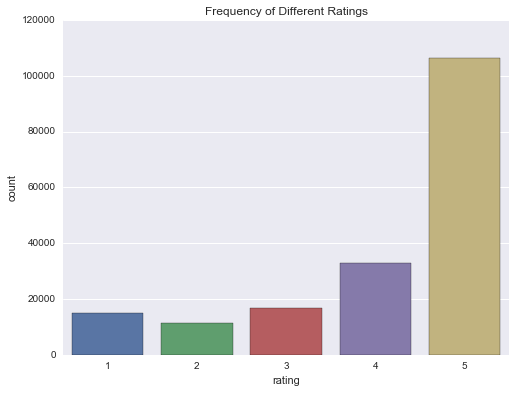

In [9]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)
sns.countplot(review.rating)
plt.title('Frequency of Different Ratings')

**The majority of the ratings are 5.**

In [10]:
# Most reviewed products

numrating = review.name.value_counts()
numrating.sort_values(ascending = False, inplace = True)

In [11]:
numrating.head(10)

Vulli Sophie the Giraffe Teether                                            779
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         560
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    558
Baby Einstein Take Along Tunes                                              545
Cloud b Twilight Constellation Night Light, Turtle                          517
Fisher-Price Booster Seat, Blue/Green/Gray                                  487
Fisher-Price Rainforest Jumperoo                                            446
Graco Nautilus 3-in-1 Car Seat, Matrix                                      418
Leachco Snoogle Total Body Pillow                                           388
Regalo Easy Step Walk Thru Gate, White                                      372
Name: name, dtype: int64

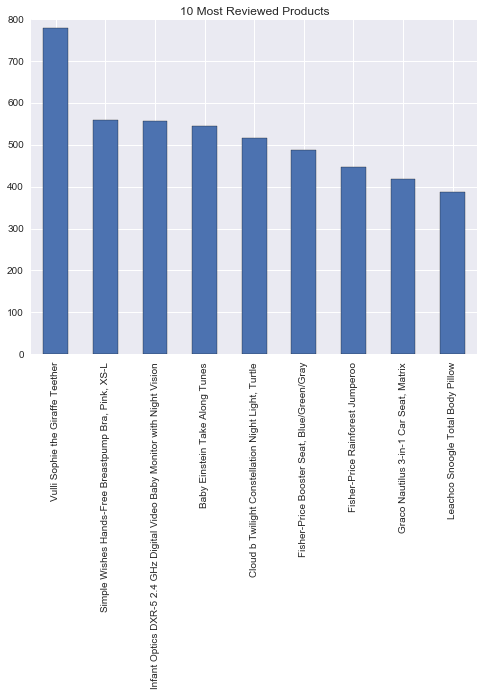

In [12]:
numrating[0:9].plot(kind = 'bar')
plt.title('10 Most Reviewed Products')

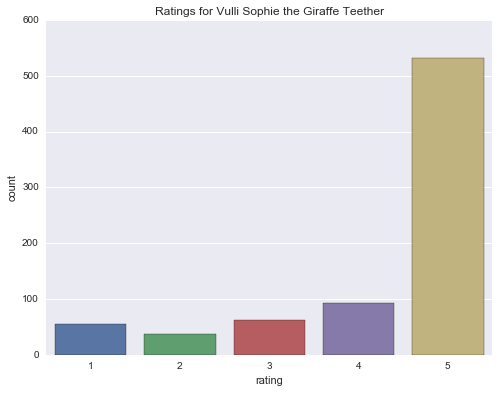

In [13]:
sns.countplot(review[review['name']=='Vulli Sophie the Giraffe Teether'].rating)
plt.title('Ratings for Vulli Sophie the Giraffe Teether')

## 3. Train sentiment classifier

Ignore all reviews with rating = 3 (neutral sentiment).   
Reviews with a rating of 4 or higher will be considered positive.  
Reviews with rating of 2 or lower will have a negative sentiment.  

In [14]:
review = review[review['rating'] != 3]

In [29]:
review['sentiment'] = 0
review.loc[review['rating'] >= 4, 'sentiment'] = 1

In [31]:
review[10:20]

,name,review,rating,sentiment
11,"Baby Tracker&reg; - Daily Childcare Journal, S...",This book is perfect! I\'m a first time new m...,5,1
12,"Baby Tracker&reg; - Daily Childcare Journal, S...",I originally just gave the nanny a pad of pape...,4,1
14,Nature\'s Lullabies First Year Sticker Calendar,"Space for monthly photos, info and a lot of us...",5,1
15,Nature\'s Lullabies First Year Sticker Calendar,I bought this calender for myself for my secon...,4,1
16,Nature\'s Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,1
17,Nature\'s Lullabies Second Year Sticker Calendar,This was the only calender I could find for th...,5,1
18,Nature\'s Lullabies Second Year Sticker Calendar,I completed a calendar for my son\'s first yea...,4,1
19,Nature\'s Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
20,Nature\'s Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,1
21,Nature\'s Lullabies Second Year Sticker Calendar,I only purchased a second-year calendar for my...,2,0


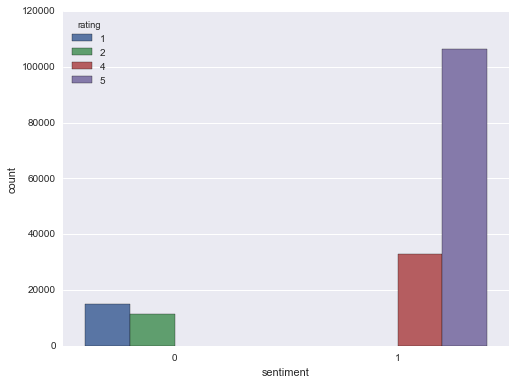

In [34]:
sns.countplot(review.sentiment, hue = review.rating)

In [37]:
# For each review with selected words
words = ['enjoy', 'like', 'amazing', 'love', 'horrible', 'bad', 'awful']
countvec2 = CountVectorizer(vocabulary = words)
vec_sub = countvec2.fit_transform(review.review)

## 4. Logistic Regression

### Using word count vector from all words

In [46]:
X_train, X_test, y_train, y_test = train_test_split(review.review, review.sentiment, test_size = 0.3, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(115975L,)
(115975L,)
(49704L,)
(49704L,)


In [50]:
# build word count using all the words
X_train_vecall = countvec.fit_transform(X_train)

In [51]:
X_train_vecall

<115975x53688 sparse matrix of type '<type 'numpy.int64'>'
	with 6182968 stored elements in Compressed Sparse Row format>

In [52]:
log.fit(X_train_vecall, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
X_test_vecall = countvec.transform(X_test)

In [54]:
y_pred = log.predict(X_test_vecall)

In [55]:
print metrics.accuracy_score(y_test, y_pred)

0.932580878803


In [56]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 5858,  2062],
       [ 1289, 40495]])

In [57]:
X_test[(y_pred == 1) & (y_test == 0)].head()

41166    I got it as a shower gift, my baby is 4 weeks ...
73182    My puppy came through the side section immedia...
18534    I for the life of me could not get the seat to...
10058    I just love this 6 Piece bedding set and all t...
41786    Consistent w/ the 1st person\'s review, both t...
Name: review, dtype: object

In [59]:
# example of a false positive prediction
X_test[41166]

'I got it as a shower gift, my baby is 4 weeks old and the thing broke already, just washing bottles, nothing special, buy the avent one instead, its great. sorry dr. browns, the bottles are great.'

In [62]:
y_pred_prob = log.predict_proba(X_test_vecall)[:, 1]

In [63]:
y_pred_prob

array([ 0.99567811,  0.95891022,  0.99174156, ...,  0.99919888,
        0.99995623,  0.99896991])

In [64]:
print metrics.roc_auc_score(y_test, y_pred_prob)

0.956757177848


### Using word count vector built from a subset of words

In [65]:
words = ['enjoy', 'like', 'amazing', 'love', 'horrible', 'bad', 'awful']
countvec2 = CountVectorizer(vocabulary = words)

In [66]:
X_train_vecsub = countvec2.fit_transform(X_train)

In [67]:
log.fit(X_train_vecsub, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
X_test_vecsub = countvec2.transform(X_test)
y_pred2 = log.predict(X_test_vecsub)

In [69]:
print metrics.accuracy_score(y_test, y_pred2)

0.844740865926


In [70]:
metrics.confusion_matrix(y_test, y_pred2)

array([[  340,  7580],
       [  137, 41647]])

In [71]:
X_test[(y_pred2 == 1) & (y_test == 0)].head()

43191    It ripped apart in the hospital the first time...
41166    I got it as a shower gift, my baby is 4 weeks ...
73182    My puppy came through the side section immedia...
57955    I purchased this scanner a few years back whil...
18534    I for the life of me could not get the seat to...
Name: review, dtype: object

In [72]:
# example of false positive prediction
X_test[43191]

'It ripped apart in the hospital the first time I used it... We had to buy another bag.  We went with a different brand.'

In [73]:
y_pred_prob2 = log.predict_proba(X_test_vecsub)[:, 1]
y_pred_prob2

array([ 0.82086262,  0.94923701,  0.82086262, ...,  0.94923701,
        0.81505632,  0.82086262])

In [74]:
print metrics.roc_auc_score(y_test, y_pred_prob2)

0.625393478329


## 5. Model Comparison

### Compare logistic regression with multinomial naive bayes model

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [76]:
# use word count vector from all words
nb.fit(X_train_vecall, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
y_pred_nb = nb.predict(X_test_vecall)

In [78]:
print metrics.accuracy_score(y_test, y_pred_nb)

0.904152583293


In [79]:
metrics.confusion_matrix(y_test, y_pred_nb)

array([[ 5546,  2374],
       [ 2390, 39394]])

In [80]:
y_pred_prob_nb = nb.predict_proba(X_test_vecall)[:, 1]
y_pred_prob_nb

array([ 0.99999795,  0.97565154,  0.9996888 , ...,  0.99855533,
        0.999999  ,  0.99987974])

In [81]:
print metrics.roc_auc_score(y_test, y_pred_prob_nb)

0.920835306565


In [82]:
X_train_token = countvec.get_feature_names()

In [83]:
print len(X_train_token)

53688


In [84]:
nb.feature_count_

array([[ 133.,   17.,    0., ...,    0.,    0.,    1.],
       [ 258.,   30.,    1., ...,    1.,    1.,    0.]])

In [85]:
# token counts for low sentiment (0) and high sentiment (1)
ls_token_count = nb.feature_count_[0, :]
hs_token_count = nb.feature_count_[1, :]

In [86]:
tokens = pd.DataFrame({'token': X_train_token, 'low_s': ls_token_count, 'high_s': hs_token_count})
tokens.head()

,high_s,low_s,token
0,258.0,133.0,00
1,30.0,17.0,000
2,1.0,0.0,0001
3,0.0,1.0,000importer
4,0.0,1.0,000sqft


In [87]:
tokens.sample(5, random_state = 0)

,high_s,low_s,token
51716,120.0,6.0,warmth
43104,6.0,4.0,smacks
2458,0.0,1.0,aargh
23261,1.0,0.0,hippies
30657,2.0,0.0,moseying


In [88]:
nb.class_count_

array([ 18441.,  97534.])

In [90]:
tokens.low_s = (tokens.low_s + 1)/nb.class_count_[0]
tokens.high_s = (tokens.high_s +1)/nb.class_count_[1]

In [91]:
tokens.sample(5, random_state = 0)

,high_s,low_s,token
51716,0.001241,0.000054,warmth
43104,0.000072,0.000054,smacks
2458,0.000010,0.000054,aargh
23261,0.000021,0.000054,hippies
30657,0.000031,0.000054,moseying


In [94]:
tokens['ratio'] = tokens.high_s/tokens.low_s

In [95]:
tokens.sample(5, random_state = 0)

,high_s,low_s,token,ratio
51716,0.001241,0.000054,warmth,22.869095
43104,0.000072,0.000054,smacks,1.323149
2458,0.000010,0.000054,aargh,0.189052
23261,0.000021,0.000054,hippies,0.378125
30657,0.000031,0.000054,moseying,0.567187


In [98]:
tokens.sort_values('ratio', ascending = True, inplace = True)

In [99]:
tokens.head(10)

,high_s,low_s,token,ratio
49511,0.00001,0.000054,tyre,0.18896
38832,0.00001,0.000054,refunds,0.18896
45709,0.00001,0.000054,substandard,0.18898
4716,0.00001,0.000054,armor,0.18898
24922,0.00001,0.000054,inoperable,0.18898
23836,0.00001,0.000054,hunk,0.18898
7078,0.00001,0.000054,bjcm,0.18898
25537,0.00001,0.000054,irresponsible,0.18898
27159,0.00001,0.000054,latitude,0.18898
273,0.00001,0.000054,128079,0.18898
